# Models without preprocessing and tweets features

In [57]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.externals import joblib

# visualization library
import seaborn as sns
sns.set(style="white", color_codes=True)
sns.set_context(rc={"font.family":'sans',"font.size":24,"axes.titlesize":24,"axes.labelsize":24})   

# import matplotlib and allow it to plot inline
import matplotlib.pyplot as plt
%matplotlib inline

# seaborn can generate several warnings, we ignore them
import warnings 
warnings.filterwarnings("ignore")

import missingno as msno
import math

### Load, join and clean datasets

In [58]:
#targets:
#    0: porn
#    1: propaganda
#    2: spam
#    3: fake followers

porn = pd.read_csv('data/porn/users.csv', encoding='utf-8-sig')
porn['target'] = 0

propaganda = pd.read_csv('data/propaganda/users.csv', encoding='utf-8-sig')
propaganda['target'] = 1

spam = pd.read_csv('data/spam/users.csv', encoding='utf-8-sig')
spam['target'] = 2

fake_followers = pd.read_csv('data/fake_followers/users.csv', encoding='utf-8-sig')
fake_followers['target'] = 3

frames = [porn, propaganda, spam, fake_followers]
users = pd.concat(frames, ignore_index=True)

In [59]:
spam.shape

(4921, 43)

### Visualize missing values

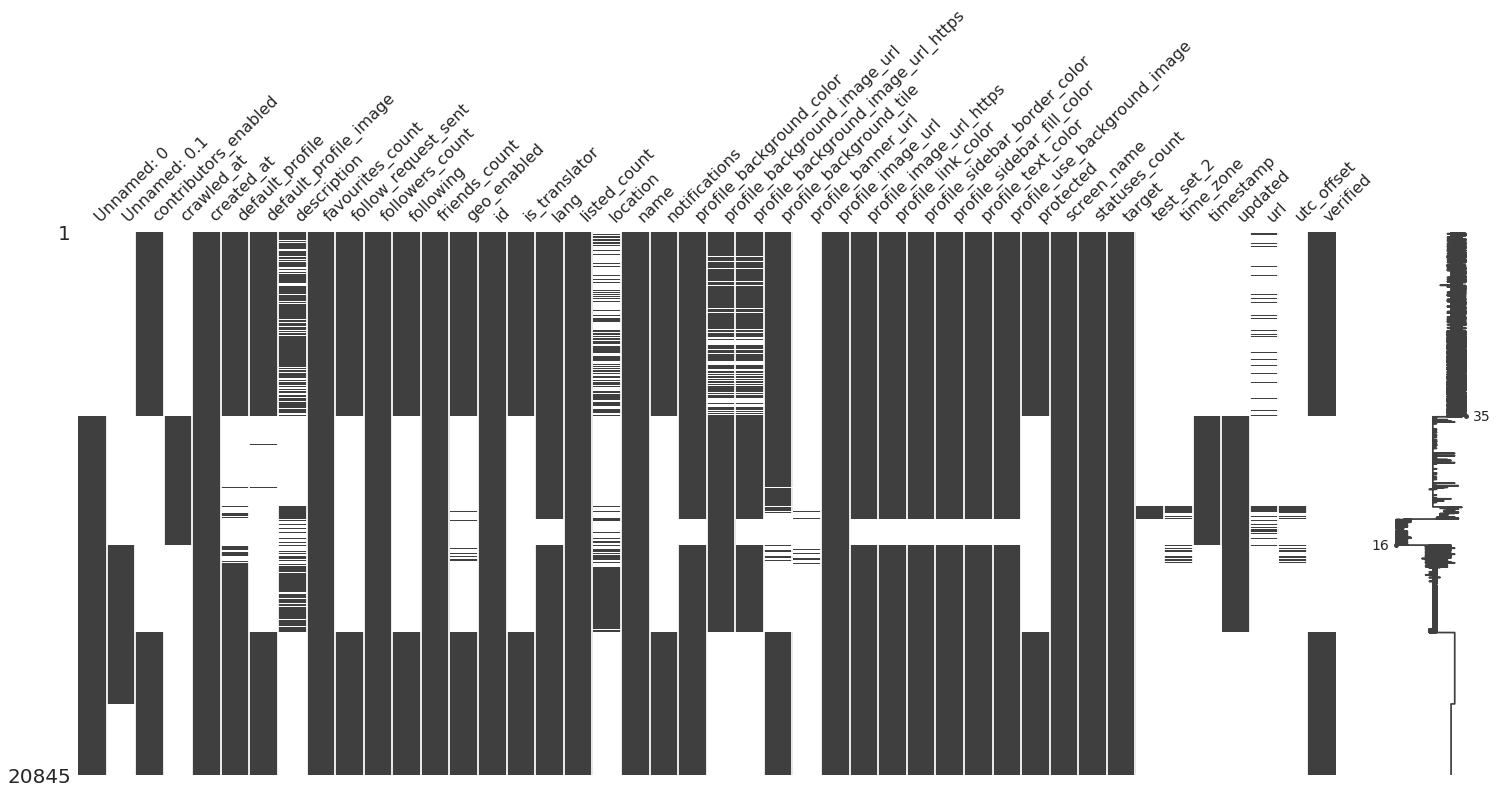

In [60]:
msno.matrix(users)

### remove attributes with a lot of missing values 

In [61]:
users = users.drop(columns=['Unnamed: 0', 'Unnamed: 0.1', 'contributors_enabled', 'crawled_at', 'follow_request_sent', 'following', 'geo_enabled', 'is_translator', 'notifications', 'profile_banner_url', 'test_set_2', 'time_zone', 'timestamp', 'updated', 'utc_offset', 'protected'], axis=1)

Save cleaned dataset

In [62]:
users.to_csv('data/full/users.csv', encoding='utf-8-sig')

### Remove useless attributes

In [63]:
users = users.drop(columns=['profile_background_image_url', 'profile_background_image_url_https', 'profile_image_url', 'profile_image_url_https'], axis=1)

### Fill missing fields

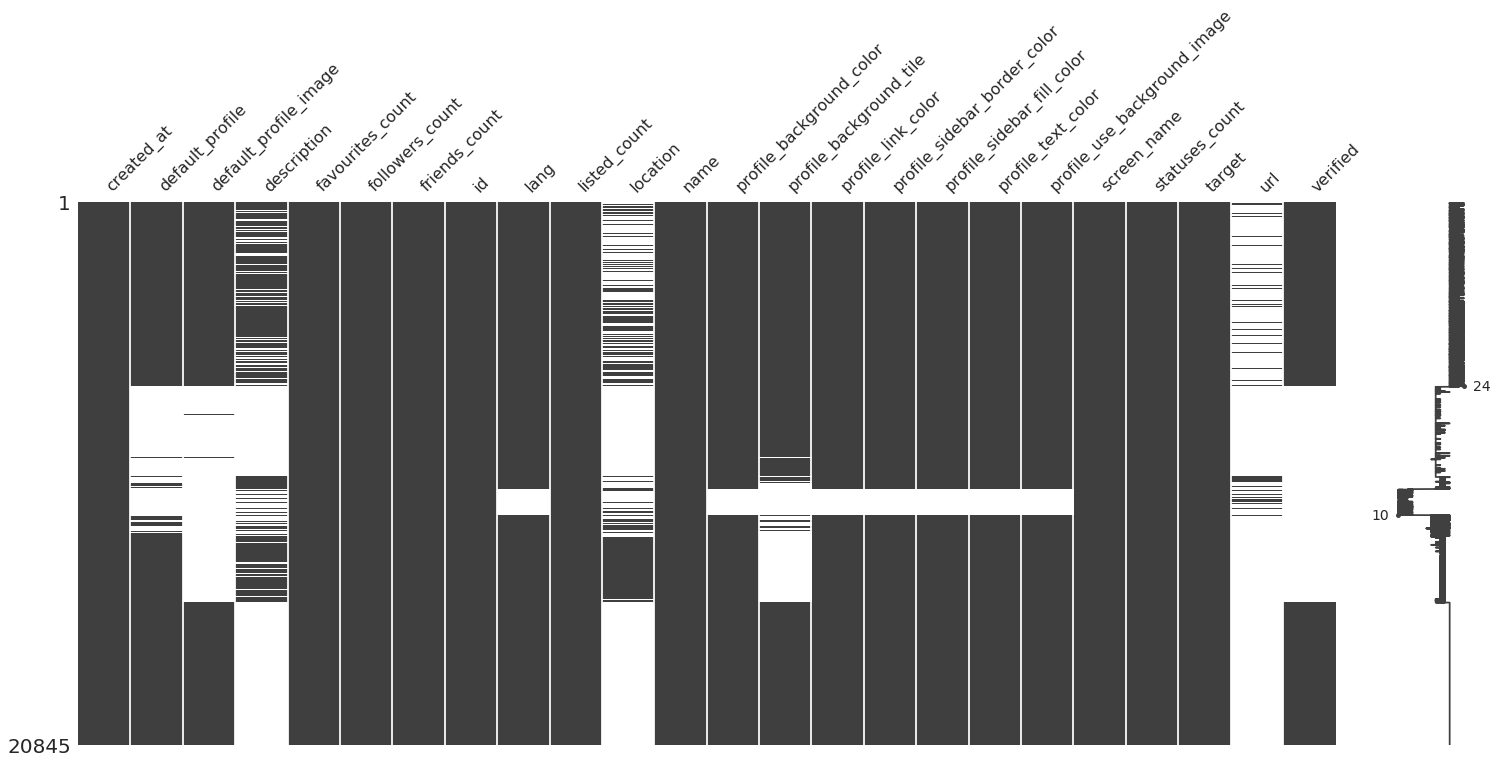

In [64]:
msno.matrix(users)

In [65]:
users['default_profile'].value_counts()

1.0    14267
0.0     1533
Name: default_profile, dtype: int64

In [66]:
users['default_profile'] = users['default_profile'].fillna(users['default_profile'].mode()[0])

In [67]:
users['default_profile_image'].value_counts()

0.0    11762
1.0      863
Name: default_profile_image, dtype: int64

In [69]:
users['default_profile_image'] = users['default_profile_image'].fillna(users['default_profile_image'].mode()[0])

In [82]:
users['description'] = users['description'].apply(lambda x: int(pd.isnull(x)))

In [84]:
users['lang'].value_counts()

en         14833
tr          2683
es           480
ru           393
fr           340
pt           294
ko           126
de           121
it           114
zh-cn         66
en-gb         56
pl            51
th            34
sv            26
ja            23
nl            22
zh-tw         20
en-GB         19
ar            18
hu            18
zh-Hans       17
zh-CN         14
id            13
uk            10
cs             9
da             8
el             7
ro             6
fi             4
zh-TW          4
he             3
zh             2
zh-HK          2
fil            1
fa             1
en-AU          1
no             1
nb             1
sk             1
lt             1
vi             1
bg             1
Name: lang, dtype: int64

In [86]:
users['lang'] = users['lang'].fillna(users['lang'].mode()[0])

In [90]:
users['location'].value_counts()

USA                               109
United States                      93
Stati Uniti                        55
Texas, USA                         54
Brasil                             49
California, USA                    48
Florida, USA                       42
US                                 38
London                             32
Texas                              27
Pennsylvania, USA                  23
New York                           23
Canada                             22
Indonesia                          21
Los Angeles, CA                    20
Los Angeles                        18
Ohio, USA                          17
India                              16
Washington, DC                     16
indonesia                          16
Rio de Janeiro                     16
New York, USA                      15
Philippines                        15
UK                                 15
Worldwide                          14
Florida                            14
São Paulo   

In [91]:
len(users['location'].value_counts())

3822

In [92]:
users = users.drop(columns=['location'], axis=1)

In [93]:
users['profile_background_color'].value_counts()

C0DEED    7433
F5F8FA    7050
0000FF    3429
000000     575
131516     335
1A1B1F     108
642D8B     105
0099B9      62
022330      53
352726      48
9AE4E8      46
ACDED6      45
FF6699      43
FFFFFF      41
BADFCD      30
B2DFDA      28
DBE9ED      25
EDECE9      24
C6E2EE      23
709397      21
8B542B      20
FFF04D      19
EBEBEB      11
89C9FA       4
020812       3
3B94D9       3
DD2E44       3
030303       2
1B95E0       2
FAFAFA       2
          ... 
0E0D02       1
141010       1
FAFDFF       1
A60000       1
9E3227       1
DFA945       1
1E4A32       1
7A0718       1
163D22       1
937096       1
110F12       1
070412       1
B2C3DE       1
A17EBA       1
485791       1
4B5F69       1
1F6E67       1
000066       1
BACDDE       1
149C14       1
BD4C4C       1
AE0DD6       1
1D2DE0       1
EBC1C1       1
9266CC       1
4A66C1       1
421311       1
281DE2       1
310B8F       1
EBDAE5       1
Name: profile_background_color, Length: 276, dtype: int64

In [94]:
users['profile_background_color'] = users['profile_background_color'].fillna(method='ffill')

In [96]:
users['profile_background_tile'].value_counts()

0.0    12132
1.0     4289
Name: profile_background_tile, dtype: int64

In [97]:
users['profile_background_tile'] = users['profile_background_tile'].fillna(method='ffill')

In [98]:
users['profile_link_color'].value_counts()

1DA1F2    11042
0084B4     3488
0000FF     3438
009999      313
1B95E0      161
FF0000      118
2FC2EF       94
E81C4F       75
981CEB       70
0099B9       63
3B94D9       48
19CF86       46
B40B43       44
D02B55       44
038543       43
ABB8C2       40
000000       29
93A644       26
CC3366       25
4A913C       25
1F98C7       23
FF3300       21
DD2E44       20
91D2FA       19
0099CC       19
088253       19
9D582E       19
F58EA8       17
7FDBB6       15
FF691F       14
          ...  
5E0239        1
4F7E8F        1
9411D6        1
000008        1
1B138A        1
2EB7E8        1
29CC00        1
CF5736        1
525252        1
71593D        1
A5C9D4        1
B40B44        1
2F8BED        1
E30022        1
6B1A2E        1
B60000        1
0091FF        1
1F285C        1
D98036        1
005C99        1
F50E6B        1
123456        1
0EF5E9        1
4C9B62        1
630EB3        1
642D8B        1
5C2404        1
8988A9        1
EB175E        1
0318FF        1
Name: profile_link_color

In [99]:
users['profile_link_color'] = users['profile_link_color'].fillna(users['profile_link_color'].mode()[0])